In [81]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import os
from os import path
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from wordcloud import WordCloud
import pathlib
import json



# loading up the language model: English
nlp = spacy.load('en')
beauty = pd.read_json('/Users/Apple/Desktop/3rd_Sem/618/Assignment/Final Project/Amazon_Review_Dataset/reviews_Beauty_5.json', orient='records',lines=True)
# 1 years
def create_reviewYear(pd):
    year = []
    for time in pd['reviewTime']:
        year.append(time.split(" ")[-1])
    pd['reviewYear']=year
    return pd
beauty = create_reviewYear(beauty)
beauty_recent = beauty[beauty.reviewYear == '2014']
document = beauty_recent['reviewText']

In [82]:
# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

def process_text(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789'''
    text = text.lower().replace('\n', ' ').replace('\t',' ').split()
#     text = map(lambda x: [y for y in x if y not in punctuations],text)
#     text = map(lambda x: [y for y in x if y not in STOP_WORDS],text)
    return text

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8, max_features=200000,
    min_df=0.2, stop_words='english',
    use_idf=True, tokenizer=process_text, ngram_range=(1,3)
)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(document)

print(tfidf_matrix.shape)

CPU times: user 19.7 s, sys: 522 ms, total: 20.2 s
Wall time: 20.2 s
(58309, 8)


In [85]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [86]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=4).fit_transform(dist[20000:40000])

In [69]:
# Enter your code here
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(reduced_data)

from scipy.cluster.hierarchy import fcluster
fcluster = fcluster(linkage_matrix, 4, criterion='maxclust')

In [87]:
i = 0
cluster_list = []
for cluster in fcluster:
    cluster_list.append((i,cluster))
    i +=1

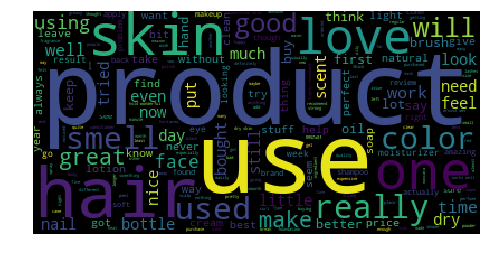

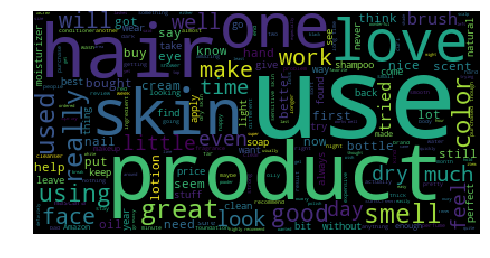

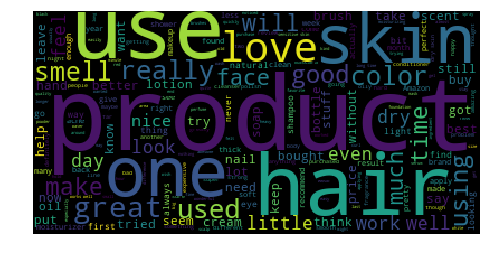

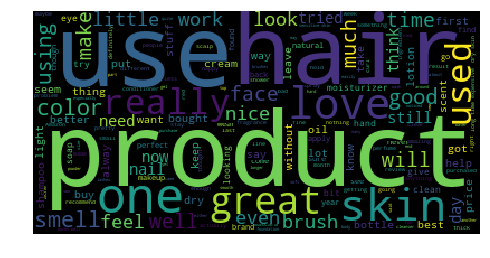

In [88]:
document['id'] = range(58309)
one = ""
two = ""
three = ""
four = ""

for item in cluster_list:
    if item[-1] == 1:
        one = one + document[item[0]]
    if item[-1] == 2:
        two = two + document[item[0]]
    if item[-1] == 3:
        three = three + document[item[0]]
    if item[-1] == 4:
        four = four + document[item[0]]

for cluster in [one,two,three,four]:
    wordcloud = WordCloud().generate(cluster)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud)
    plt.axis("off")   
    plt.show()

In [100]:
from collections import Counter
one_counts = Counter(one.split()).most_common(150)
one_counts

[('I', 8091),
 ('and', 6894),
 ('the', 6878),
 ('a', 5662),
 ('it', 5116),
 ('to', 4830),
 ('my', 4024),
 ('this', 3526),
 ('is', 3414),
 ('for', 2737),
 ('of', 2652),
 ('have', 2086),
 ('in', 2031),
 ('on', 1987),
 ('but', 1892),
 ('that', 1887),
 ('with', 1672),
 ('not', 1569),
 ('hair', 1383),
 ('was', 1343),
 ('you', 1294),
 ('use', 1289),
 ('so', 1288),
 ('like', 1244),
 ('as', 1213),
 ('It', 1201),
 ('skin', 1026),
 ('product', 919),
 ('your', 871),
 ('very', 863),
 ('just', 825),
 ('or', 806),
 ('be', 770),
 ('will', 761),
 ('at', 725),
 ('really', 722),
 ('are', 714),
 ('when', 678),
 ('using', 676),
 ('love', 638),
 ('all', 632),
 ('has', 631),
 ('one', 618),
 ('The', 614),
 ("it's", 601),
 ('used', 599),
 ('out', 596),
 ('if', 596),
 ('get', 584),
 ('me', 583),
 ('more', 574),
 ('had', 569),
 ('good', 565),
 ('would', 553),
 ('because', 546),
 ("don't", 530),
 ('after', 520),
 ('This', 519),
 ('can', 509),
 ('about', 509),
 ('from', 504),
 ('am', 502),
 ('than', 487),
 ('does

In [101]:
from collections import Counter
two_counts = Counter(two.split()).most_common(150)
two_counts

[('I', 13089),
 ('and', 11461),
 ('the', 11140),
 ('a', 9228),
 ('it', 8438),
 ('to', 7950),
 ('my', 6729),
 ('this', 5643),
 ('is', 5472),
 ('for', 4504),
 ('of', 4355),
 ('in', 3273),
 ('on', 3244),
 ('that', 3229),
 ('have', 3225),
 ('but', 3020),
 ('with', 2721),
 ('not', 2532),
 ('was', 2257),
 ('hair', 2214),
 ('you', 2169),
 ('use', 2161),
 ('so', 2129),
 ('It', 1958),
 ('like', 1917),
 ('as', 1915),
 ('skin', 1659),
 ('very', 1480),
 ('your', 1427),
 ('product', 1412),
 ('just', 1362),
 ('or', 1357),
 ('be', 1243),
 ('will', 1198),
 ('are', 1154),
 ('all', 1151),
 ('really', 1148),
 ('at', 1131),
 ('love', 1084),
 ('The', 1067),
 ('using', 1061),
 ('when', 1032),
 ('get', 1022),
 ('used', 1006),
 ('has', 1002),
 ('out', 978),
 ('great', 969),
 ('if', 965),
 ('me', 953),
 ('would', 950),
 ('good', 930),
 ('one', 925),
 ('can', 900),
 ('more', 888),
 ("it's", 885),
 ('after', 877),
 ('had', 845),
 ('do', 839),
 ('because', 833),
 ('from', 831),
 ('does', 819),
 ('This', 813),
 ("

In [102]:
from collections import Counter
three_counts = Counter(three.split()).most_common(150)
three_counts

[('I', 8378),
 ('and', 7051),
 ('the', 6950),
 ('a', 5611),
 ('it', 5161),
 ('to', 4936),
 ('my', 4278),
 ('this', 3567),
 ('is', 3428),
 ('for', 2953),
 ('of', 2777),
 ('have', 2050),
 ('that', 2017),
 ('on', 1989),
 ('in', 1945),
 ('but', 1945),
 ('with', 1710),
 ('not', 1585),
 ('hair', 1425),
 ('was', 1355),
 ('so', 1341),
 ('use', 1308),
 ('like', 1269),
 ('you', 1269),
 ('It', 1210),
 ('as', 1193),
 ('skin', 982),
 ('very', 927),
 ('or', 907),
 ('product', 903),
 ('be', 831),
 ('just', 792),
 ('your', 773),
 ('are', 767),
 ('really', 734),
 ('will', 730),
 ('at', 710),
 ('all', 675),
 ('using', 663),
 ('one', 659),
 ('The', 624),
 ('if', 621),
 ('has', 616),
 ('would', 616),
 ('love', 615),
 ('out', 614),
 ('when', 605),
 ('get', 592),
 ('great', 589),
 ('used', 587),
 ('good', 561),
 ('can', 556),
 ('me', 551),
 ('after', 548),
 ('more', 546),
 ('had', 541),
 ('This', 522),
 ('do', 518),
 ('from', 510),
 ('does', 504),
 ('because', 502),
 ("don't", 499),
 ("it's", 498),
 ('about

In [103]:
from collections import Counter
four_counts = Counter(four.split()).most_common(150)
four_counts

[('I', 17730),
 ('the', 15379),
 ('and', 15284),
 ('a', 12581),
 ('it', 11313),
 ('to', 10898),
 ('my', 8949),
 ('is', 7780),
 ('this', 7778),
 ('for', 6290),
 ('of', 6246),
 ('have', 4557),
 ('that', 4428),
 ('in', 4338),
 ('on', 4257),
 ('but', 4111),
 ('with', 3845),
 ('not', 3502),
 ('hair', 3212),
 ('you', 2979),
 ('so', 2957),
 ('was', 2950),
 ('use', 2805),
 ('as', 2705),
 ('like', 2701),
 ('It', 2664),
 ('skin', 2167),
 ('very', 2034),
 ('product', 1981),
 ('or', 1907),
 ('just', 1787),
 ('your', 1784),
 ('be', 1776),
 ('will', 1682),
 ('really', 1682),
 ('are', 1660),
 ('using', 1509),
 ('at', 1501),
 ('love', 1472),
 ('has', 1462),
 ('The', 1436),
 ('when', 1424),
 ('one', 1424),
 ('all', 1404),
 ('used', 1403),
 ('out', 1343),
 ('get', 1334),
 ('if', 1329),
 ('would', 1323),
 ('more', 1301),
 ('great', 1295),
 ('good', 1274),
 ("it's", 1268),
 ('can', 1208),
 ("don't", 1204),
 ('because', 1190),
 ('had', 1187),
 ('me', 1163),
 ('do', 1152),
 ('from', 1131),
 ('after', 1120),

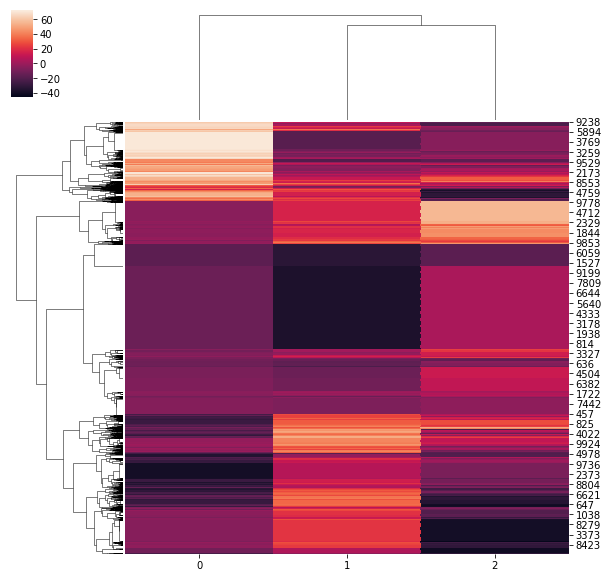

In [20]:
# # Use seaborn's .clustermap() function to draw a hierarchically-clustered heatmap
sns.clustermap(reduced_data)

158.11388300841898


(1, 9.35)

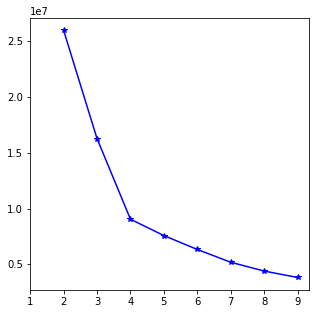

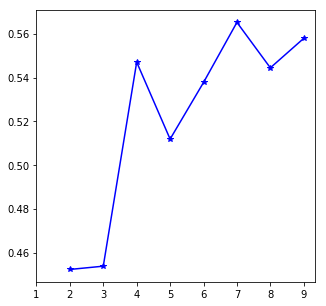

In [33]:
from sklearn import metrics
from sklearn.cluster import KMeans

# Insert your code here

# Rule of Thumb 
k = np.sqrt(50000/2)
print(k)

# two different cost functions 
# elbow
elbow_score = []
for k in range(2,10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(reduced_data)
    elbow_score.append(k_means.inertia_)

# sihouette
sihouette_score = []
for k in range(2,10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(reduced_data)
    sihouette_score.append(metrics.silhouette_score(reduced_data, k_means.labels_))

score = pd.DataFrame()
score['elbow'] = elbow_score
score['sihouette'] = sihouette_score

score
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.plot(range(2,10), score['elbow'], 'b*-')
plt.xlim(1, plt.xlim()[1])

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.plot(range(2,10), score['sihouette'], 'b*-')
plt.xlim(1, plt.xlim()[1])

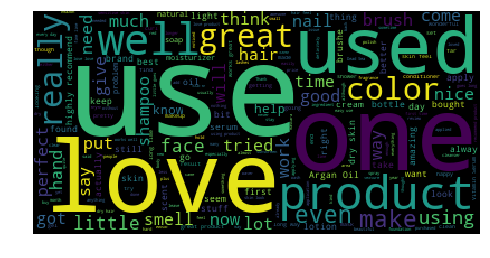

In [66]:
five_beauty_recent = beauty[(beauty.reviewYear == '2014')&(beauty.overall == 5.0)]
document = five_beauty_recent['reviewText']
one = ""
for item in document:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

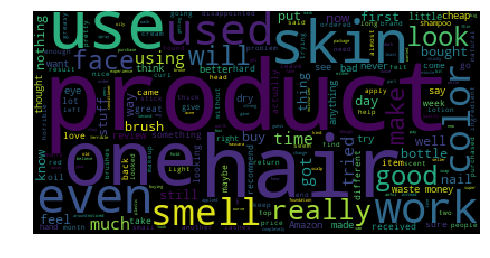

In [67]:
one_beauty_recent = beauty[(beauty.reviewYear == '2014')&(beauty.overall == 1.0)]
document = one_beauty_recent['reviewText']
one = ""
for item in document:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

Word cloud - for different group
High - rating
Low- rating
High-popular - helpful
low -popular-helpful
High - rating + high helpful
Low-rating + high helpful
Combined with previous problem
Similarity between these groups

In [109]:
beauty_recent = beauty[(beauty.reviewYear == '2010')|(beauty.reviewYear == '2011')|(beauty.reviewYear == '2012')|(beauty.reviewYear == '2013')|(beauty.reviewYear == '2014')]
beauty_recent['id'] = range(192377)

In [138]:
# the rating base - how many people provides their opinions? the more the better.
low_popular_helpfulness = []
for i in range(50000):
    if beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1] >= 20:
        score = float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[0])/float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1])
        if score <= 0.5 :
            low_popular_helpfulness.append(beauty_recent[beauty_recent['id']== i ]['reviewText'].item()) 

high_popular_helpfulness = []
for i in range(50000):
    if beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1] >= 20:
        score = float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[0])/float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1])
        if score >= 0.8 :
            high_popular_helpfulness.append(beauty_recent[beauty_recent['id']== i ]['reviewText'].item()) 

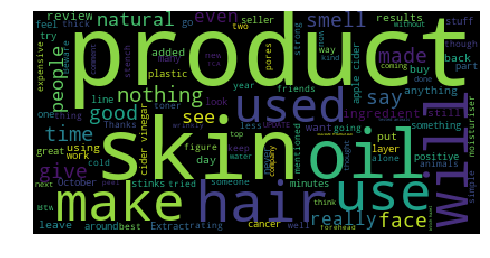

In [139]:
one = ""
for item in low_popular_helpfulness:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

In [141]:
low_popular_helpfulness = one

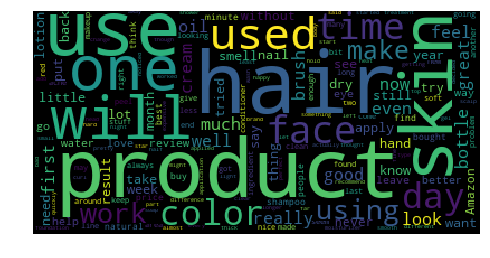

In [142]:
one = ""
for item in high_popular_helpfulness:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

In [143]:
high_popular_helpfulness = one

In [116]:
def prepare_text(point):
    points = beauty[((beauty.overall == point) & (beauty.reviewYear == '2005'))|((beauty.overall == point) & (beauty.reviewYear == '2006'))|((beauty.overall == point) & (beauty.reviewYear == '2007'))|((beauty.overall == point) & (beauty.reviewYear == '2008'))|((beauty.overall == point) & (beauty.reviewYear == '2009'))|((beauty.overall == point) & (beauty.reviewYear == '2010'))|((beauty.overall == point) & (beauty.reviewYear == '2011'))|((beauty.overall == point) & (beauty.reviewYear == '2012')) | ((beauty.overall == point) & (beauty.reviewYear == '2013')) | ((beauty.overall == point) & (beauty.reviewYear == '2014'))]
    return points 

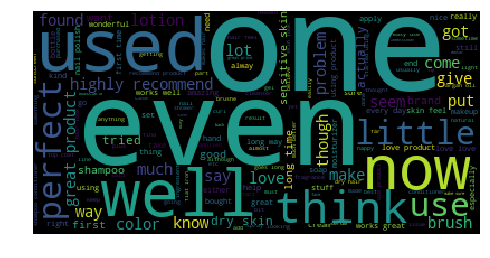

In [144]:
five_points_review = prepare_text(5.0)
document = five_points_review['reviewText']
one = ""
for item in document:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

In [146]:
five_points_review = one

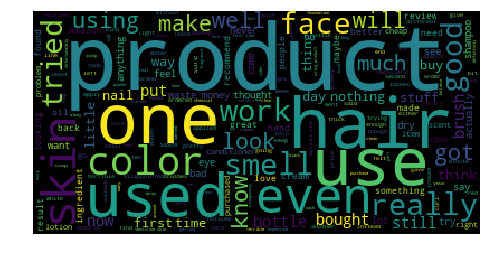

In [147]:
one_points_review = prepare_text(1.0)
document = one_points_review['reviewText']
one = ""
for item in document:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

In [148]:
one_points_review  = one

In [122]:
# high rating 5.0.

low_popular_helpfulness = []
for i in range(50000):
    if beauty_recent[beauty_recent['id']== i ]['overall'].item() == 5.0:
        if beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1] >= 20:
            score = float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[0])/float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1])
            if score <= 0.5 :
                low_popular_helpfulness.append(beauty_recent[beauty_recent['id']== i ]['reviewText'].item()) 

high_popular_helpfulness = []
for i in range(50000):
    if beauty_recent[beauty_recent['id']== i ]['overall'].item() == 5.0:
        if beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1] >= 20:
            score = float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[0])/float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1])
            if score >= 0.8 :
                high_popular_helpfulness.append(beauty_recent[beauty_recent['id']== i ]['reviewText'].item()) 

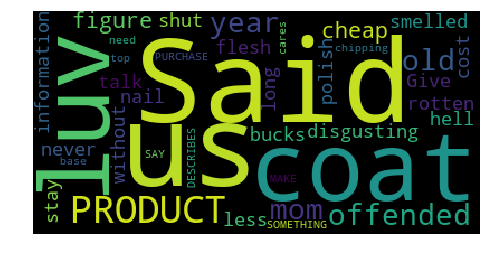

In [130]:
one = ""
for item in low_popular_helpfulness:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

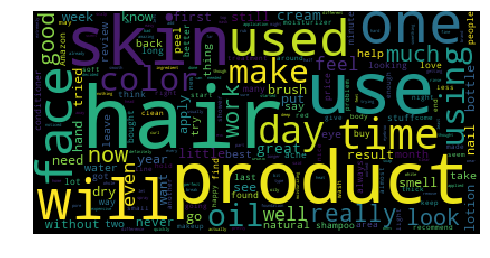

In [125]:
one = ""
for item in high_popular_helpfulness:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

In [131]:
# low rating 1.0.
low_popular_helpfulness = []
for i in range(50000):
    if beauty_recent[beauty_recent['id']== i ]['overall'].item() == 1.0:
        if beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1] >= 20:
            score = float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[0])/float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1])
            if score <= 0.5 :
                low_popular_helpfulness.append(beauty_recent[beauty_recent['id']== i ]['reviewText'].item()) 

high_popular_helpfulness = []
for i in range(50000):
    if beauty_recent[beauty_recent['id']== i ]['overall'].item() == 1.0:
        if beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1] >= 20:
            score = float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[0])/float(beauty_recent[beauty_recent['id']== i ]['helpful'].item()[1])
            if score >= 0.8 :
                high_popular_helpfulness.append(beauty_recent[beauty_recent['id']== i ]['reviewText'].item()) 

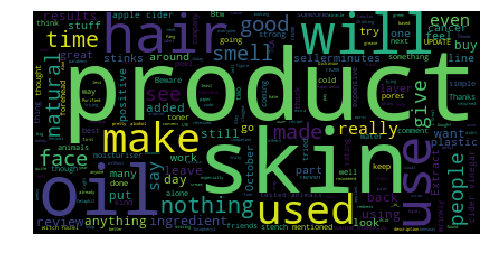

In [137]:
one = ""
for item in low_popular_helpfulness:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

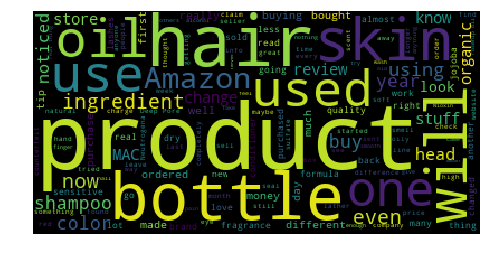

In [135]:
one = ""
for item in high_popular_helpfulness:
    one = one + item
wordcloud = WordCloud().generate(one)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")   
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def process_text(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789'''
    text = text.lower().replace('\n', ' ').replace('\t',' ').split()
    text = map(lambda x: [y for y in x if y not in punctuations],text)
    text = map(lambda x: [y for y in x if y not in STOP_WORDS],text)
    return text

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8, max_features=200000,
    min_df=0.2, stop_words='english',
    use_idf=True, tokenizer=process_text, ngram_range=(1,3)
)

In [149]:
review = [one_points_review,five_points_review,high_popular_helpfulness,low_popular_helpfulness]
%time tfidf_matrix = tfidf_vectorizer.fit_transform(review)
print(tfidf_matrix.shape)
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

CPU times: user 52.2 s, sys: 3.98 s, total: 56.2 s
Wall time: 1min 1s
(4, 200000)


In [150]:
print(dist)

[[ 1.12132525e-14  1.74473717e-01  1.89460235e-01  9.80825904e-01]
 [ 1.74473717e-01  3.90798505e-14  1.49544113e-01  9.92572882e-01]
 [ 1.89460235e-01  1.49544113e-01 -1.02584607e-13  1.00000000e+00]
 [ 9.80825904e-01  9.92572882e-01  1.00000000e+00  3.33066907e-16]]


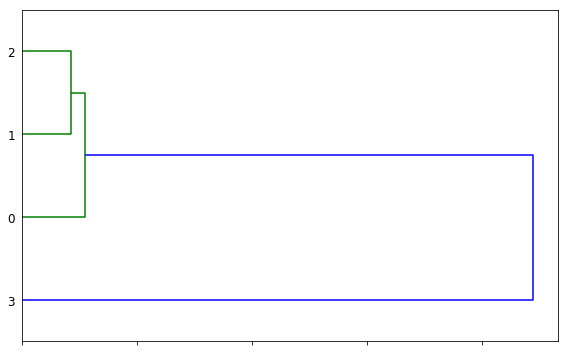

In [153]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

fig, ax = plt.subplots(figsize=(8, 5))
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='off')
plt.tight_layout()
plt.show()